<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Simple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [101]:
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['numpy'])
# await piplite.install(['scikit-learn'])

! pip install pandas matplotlib numpy scikit-learn


In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [103]:
def get_data(path):
    try:
        response = requests.get(path)
        response.raise_for_status()  # Lever une exception si le statut n'est pas 200 OK
        
        # Charger les données CSV avec pandas
        df = pd.read_csv(path)
        return df
    
    except requests.exceptions.HTTPError:
        return pd.DataFrame({'Error': ['Bad Request'], 'Data': ['No Data']})
    
    except requests.exceptions.RequestException:
        return pd.DataFrame({'Error': ['Request Error'], 'Data': ['No Data']})
    
    except pd.errors.ParserError:
        return pd.DataFrame({'Error': ['CSV Parsing Error'], 'Data': ['No Data']})
    
    except Exception as err:
        return pd.DataFrame({'Error': ['Unexpected Error'], 'Message': [str(err)]})


In [104]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df = get_data(url)
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212



## Comprendre les données

### `FuelConsumption.csv` :
Nous avons téléchargé un ensemble de données sur la consommation de carburant, **`FuelConsumption.csv`**, qui contient les cotes de consommation de carburant spécifiques au modèle et les émissions estimées de dioxyde de carbone pour les nouveaux véhicules légers vendus au détail au Canada. [Source du jeu de données](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Exploration des données
Commençons par une exploration descriptive de nos données.


In [105]:
data_description = df.describe()
data_description

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [106]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


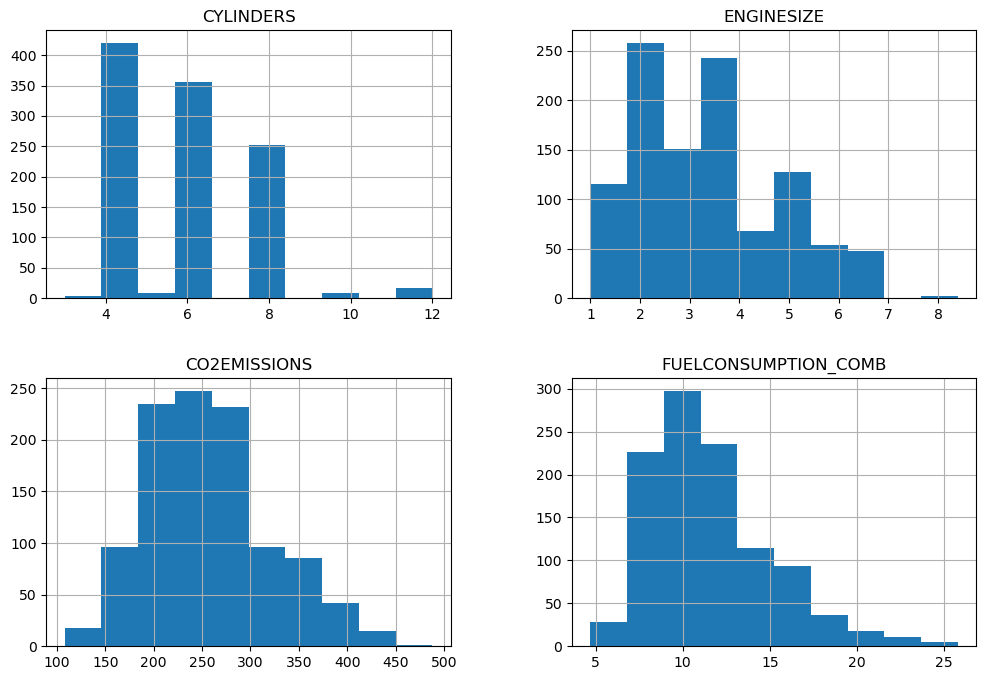

In [126]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist(figsize=(12,8))
plt.show()

Représentons maintenant chacune de ces caractéristiques par rapport à l'émission, afin de voir si leur relation est linéaire :


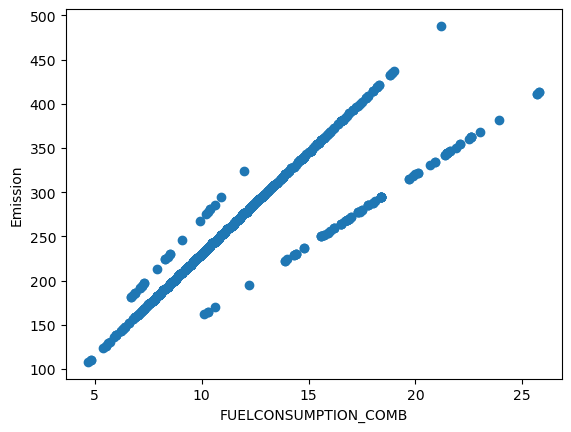

In [118]:
# plt.figure(figsize=(9,8))
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

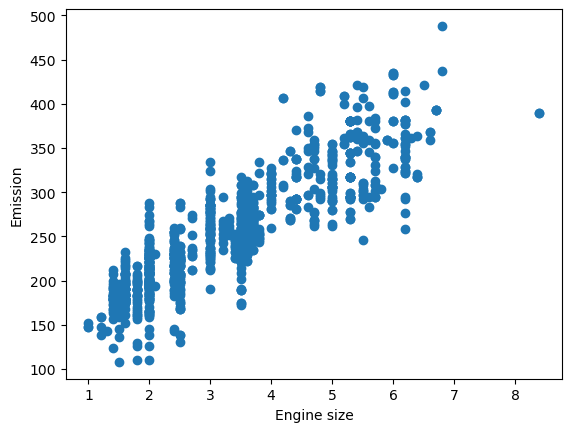

In [109]:
# plt.figure(figsize=(9,8))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

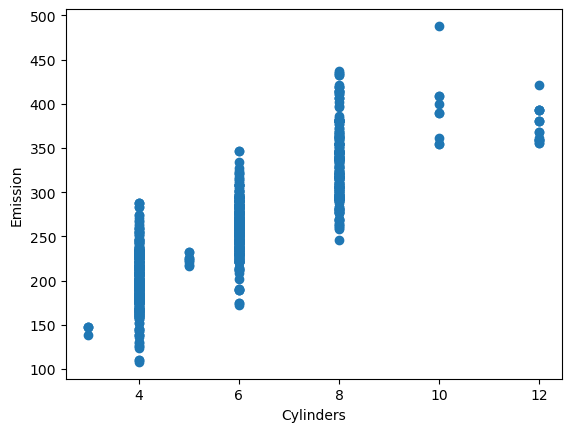

In [110]:
# plt.figure(figsize=(9,8))
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

En analysant les plots on se rend compte que seule la variable `ENGINSIZE` varie de facon lineaire avec `CO2EMISSIONS`. On peut ainsi dire que l'emission de $CO_2$ d'un vehicule ne depend que de la taille de son moteur (d'apres nos donnees)

#### Création d'un ensemble de données de formation et de test
La division formation/test consiste à diviser l'ensemble de données en ensembles de formation et de test qui s'excluent mutuellement. Ensuite, vous vous entraînez avec l'ensemble d'entraînement et vous testez avec l'ensemble de test. 
Cela permet d'obtenir une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour former le modèle. Par conséquent, cela nous permet de mieux comprendre dans quelle mesure notre modèle se généralise sur de nouvelles données.

Cela signifie que nous connaissons le résultat de chaque point de données dans l'ensemble de données de test, ce qui en fait un excellent outil de test ! Comme ces données n'ont pas été utilisées pour former le modèle, ce dernier ne connaît pas le résultat de ces points de données. Il s'agit donc, par essence, d'un test hors échantillon.

Divisons notre ensemble de données en ensembles de formation et de test. 80 % de l'ensemble des données seront utilisés pour la formation et 20 % pour le test. Nous créons un masque pour sélectionner des lignes aléatoires à l'aide de la fonction __np.random.rand()__ : 


In [111]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [112]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
15,4.7,8,15.4,354
22,2.0,4,10.0,230
28,3.0,6,11.2,258
39,3.0,6,11.2,258
51,5.2,10,17.8,409
...,...,...,...,...
1042,1.4,4,5.4,124
1054,3.6,6,12.2,281
1057,2.5,5,10.1,232
1059,3.2,6,10.2,235


### Modèle de régression simple
La régression linéaire ajuste un modèle linéaire avec des coefficients B = (B1, ..., Bn) pour minimiser la « somme résiduelle des carrés » entre la valeur réelle y dans l'ensemble de données et la valeur prédite yhat en utilisant l'approximation linéaire. 


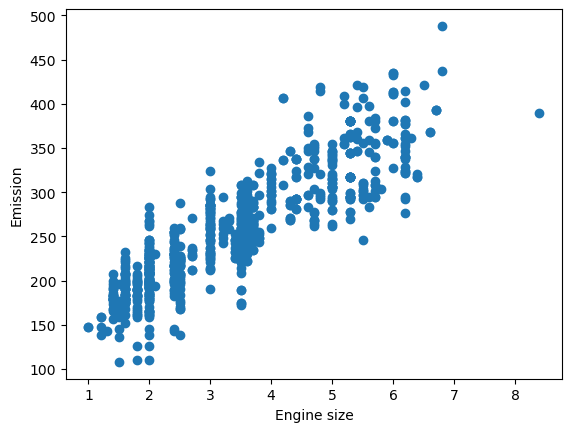

In [113]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [114]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.15621142]]
Intercept:  [124.89766744]


Comme mentionné précédemment, __Coefficient__ et __Intercept__ dans la régression linéaire simple, sont les paramètres de la ligne d'ajustement. 
Etant donné qu'il s'agit d'une régression linéaire simple, avec seulement 2 paramètres, et sachant que les paramètres sont l'ordonnée à l'origine et la pente de la ligne, sklearn peut les estimer directement à partir de nos données. 
Notez que toutes les données doivent être disponibles pour parcourir et calculer les paramètres.
#### Plot outputs
We can plot the fit line over the data:


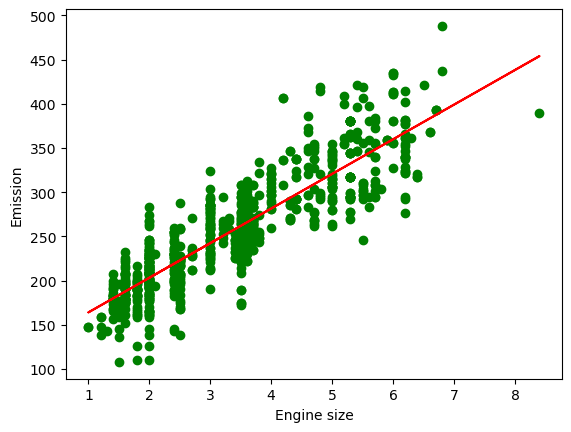

In [129]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c='g')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Évaluation
Nous comparons les valeurs réelles et les valeurs prédites pour calculer la précision d'un modèle de régression. Les mesures d'évaluation jouent un rôle clé dans le développement d'un modèle, car elles donnent un aperçu des domaines à améliorer.

Il existe différentes mesures d'évaluation des modèles. Utilisons ici l'EQM pour calculer la précision de notre modèle sur la base de l'ensemble de test : 
* Erreur absolue moyenne : Il s'agit de la moyenne de la valeur absolue des erreurs. C'est la mesure la plus facile à comprendre puisqu'il s'agit simplement de l'erreur moyenne.

* Erreur quadratique moyenne (EQM) : L'erreur quadratique moyenne (EQM) est la moyenne de l'erreur quadratique. Elle est plus populaire que l'erreur absolue moyenne car elle est davantage axée sur les erreurs importantes. Cela est dû au fait que le terme quadratique augmente de manière exponentielle les erreurs plus importantes par rapport aux plus petites.

* Erreur quadratique moyenne (RMSE). 

* Le R au carré n'est pas une erreur, mais plutôt une mesure populaire pour évaluer la performance de votre modèle de régression. Il représente la proximité des points de données par rapport à la ligne de régression ajustée. Plus la valeur du R au carré est élevée, mieux le modèle s'adapte à vos données. Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement moins bon).


In [130]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.81
Residual sum of squares (MSE): 1059.91
R2-score: 0.74
